<div style="background-color: #ccccff ; padding:10px; font-size:x-large; font-weight: bold">
EGD103 Assignment 1A: Simulating a Simple Telecommunications System
</div>

In this assignment you will be using programming theory to help simulate a simple telecommunications system that sends text messages through a noisy channel.

This assignment is split into two parts:
* **Part A (10%) is due Friday week 4**. In this part you will simulate sending a character through a noisy channel to a receiver.
* **Part B (20%) is due Friday week 7**. In this part you will employ some error control coding theory to try and reduce the amount of errors when sending messages.

<div style="background-color: #ffcccc; padding:10px">
    
## General Rules and Restrictions
* You must use Jupyter in the cloud (on https://jupyter.eres.qut.edu.au) to develop your solution.
* For the assignments you cannot work with friends or colleagues, or get help from anyone other than the EGD103 teaching team - it needs to be entirely your own work.
* You cannot use AI tools such as ChatGPT or Copilot to help develop your solution.
* Do not modify any function names, parameters or test cases provided in this notebook.
* Every function must be implemented in only one place within this .ipynb file (where it is already defined). Do not cut and paste to create duplicate definitions of the same function.
* Do not add any import statements. The only modules you are allowed to import are the ones that have been imported for you within this assignment template.
* You should only use Python language features that have been taught within this unit. If you use other features we will suspect acadamic misconduct and require you to attend meeting to authenticate your learning.
</div>

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
    
## Student Details
<p>Task: Using the Markdown cell below, write your name and student number. Also briefly describe any previous programming experience you may have had (if any).</p>

* Name: 
* Student number:
* Previous programming experience: 

## A1: An Introduction to Communications Systems
A simple communications system includes three core components:
1. **An encoder**. This takes the information to be transmitted (eg. audio for a phone call, video for streaming, text for an email) and converts it to code that can be electronically transmitted.
2. **A channel**. This is the medium through which the electronic signals are transmitted through.
3. **A decoder**. This receives code that has been transmitted and converts it back to information, performing the inverse process of the encoder.

In an ideal channel, no errors will occur during transmission, leading to the received information being the same as what was sent. However, all channels have some amount of noise present which can lead to errors occuring as they pass through the channel. This can lead to receiving a different message to what was sent. An example of this process is pictured below.

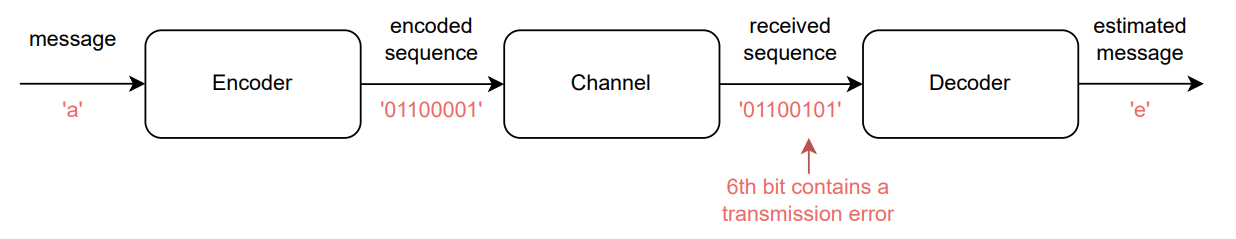

## A2: Introducing the <code>comms</code> Module
We have provided you with a module named <code>comms</code> to assist with simulating a simple communications system. The comms module includes functions that perform the main actions of a communications system: encoding, transmitting, and decoding. This module is imported using the code cell below. Make sure that the file 'comms.py' is located in the same location as this notebook.

In [ ]:
# run this cell to import the comms module
import comms

To read documentation on the functions contained in this module, we can call the <code>help</code> function.

In [ ]:
# run this cell to read documentation for the comms module
help(comms)

## A3: Using the <code>comms</code> Module
In this section we want to test that you can correctly call functions imported from the comms module.

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
<p>Task: Call the <code>encode</code> function to find the encoded version of the character <code>'b'</code>. Should return <code>'01100010'</code>.</p>

In [ ]:
# insert your code here

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
<p>Task: Call the <code>decode</code> function to find the decoded version of the bitstream <code>'00110011'</code>. Should return <code>'3'</code>.</p>

In [ ]:
# insert your code here

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
<p>Task: Call the <code>transmit_bitstream</code> function to find the bitstream that is received when sending <code>'10000100'</code> with a bit error probability of 0.2 and a seed of 1. Should return <code>'00000100'</code>.</p>

In [ ]:
# insert your code here

## A4: Sending a Character
We would now like you to create your own user-defined function that will simulate sending a character through a communications system. Your solution must call functions from the <code>comms</code> module to simulate all the main steps of sending a character.

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
<p></p>Task: Create a function that accepts three inputs: a character, a bit error rate that defaults to 0.01, and a seed that defaults to None.</p>

The function should:
1. Encode the character.
2. Transmit with the supplied bit error rate and seed.
3. Decode the received bitstream.
4. Return the received character.

In [ ]:
def send_character(character, BER=0.01, seed=None):
    pass # replace pass with your solution

In [ ]:
# test case 1: Run this many times. 
# you should observe it usually returns 'a', but sometimes there will be a transmission error
send_character('a')

In [ ]:
# test case 2: should return 'a', meaning no transmission error
# since a seed is provided, will always return the same character
send_character('a', seed=1)

In [ ]:
# test case 3: should return 'i', meaning there is a transmission error
# since a different seed was used, we get a different 'random' result than the previous test case
send_character('a', seed=6)

In [ ]:
# test case 4: should return 'c'
# Here we have changed the default bit error probability to 0.3
send_character('a', BER=0.3, seed=3)

## A5: Transmission Error Probability
You should now have seen that sometimes the received character will be different to the sent character due to noise in the communications channel. With the current system we have set up, an error will occur if just a single bit changes during transmission.

The probability of a bitstream containing at least one bit error can be calculated with the following equation: $1 - (1 - p)^n$, where $p$ is the bit error rate and $n$ is the number of bits in the bitstream. $p$ must be a number between 0 and 1 inclusive, while $n$ must be a positive integer.

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
Task: Create a function that accepts two inputs: the number of bits and a bit error rate. The function should output the probability of the bitstream containing at least one bit error. The function should raise an exception if either input has an invalid value (eg. wrong data type, invalid value). 
</div>

In [ ]:
def compute_transmission_error_rate(n_bits, BER):
    pass # replace pass with your solution

In [ ]:
# test case 1 - sending a single character with the default bit error rate of 1%
# should return 0.07725530557207994
compute_transmission_error_rate(8, 0.01)

In [ ]:
# test case 2 - sending 10 characters with a higher bit error rate of 5%
# should return 0.9834846256149864
compute_transmission_error_rate(10*8, 0.05)

In [ ]:
# test case 3 - using an invalid value for n_bits
try:
    compute_transmission_error_rate(3.4, 0.01)
except:
    print('Correct. Your function raises an exception.')
else:
    print('Incorrect. Your function needs to raise an exception.')

In [ ]:
# test case 4 - using an invalid value for n_bits
try:
    compute_transmission_error_rate(-2, 0.01)
except:
    print('Correct. Your function raises an exception.')
else:
    print('Incorrect. Your function needs to raise an exception.')

In [ ]:
# test case 5 - using an invalid value for BER
try:
    compute_transmission_error_rate(8, 1.1)
except:
    print('Correct. Your function raises an exception.')
else:
    print('Incorrect. Your function needs to raise an exception.')

In [ ]:
# test case 6 - using an invalid value for BER
try:
    compute_transmission_error_rate(8, -2)
except:
    print('Correct. Your function raises an exception.')
else:
    print('Incorrect. Your function needs to raise an exception.')

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">

## A6: Learning reflection (approx 200 words)

<p>Write a reflection of your learning from completing this assignment in the Markdown cell below. 
    
Examples of things you might want to discuss include:
* Programming concepts you learned.
* Errors you made and how you troubleshooted them.
* Earlier drafts of code and how you improved them.
* Resources from EGD103 you found most useful when completing the assignment.
* Good programming practices you developed.
* Areas of improvement.

The word count is suggestive and won't be rigidly enforced as a limit. Supplementary code provided will not be counted towards the word count.
</p>

Write your summary here.